# **Chapter 6 - Decision Trees**
Same as **SVMs** **Decision Trees** can also perform both classification and Regression Tasks here are some of the capabilities of `Decision Trees` :-
- Calssification Tasks
- Regression Tasks
- Mutioutput Tasks
- can Fit Complex Datasets

`Decision Trees` are also fundamental Components of `Random Forest`

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "5.Support_Vector_Machines"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Training and Visualizing a Decision Tree
with the Purpose of understanding Decision Trees Let's Train it on `iris` dataset.

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # Petal Length and Width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

Now we can Visualize the trained Decision Tree by first using `export_graphviz()` method to output a graph definition file called `iris_tree.dot`

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

After this we can use command line tool `dot` to convert this file into `png` or other formats by the command given below:-
```bash
$ dot -Tpng iris_tree.dot -o iris_tree.png
``` 

<div align="center">

![iris_tree.png](iris_tree.png)
<p>iris_tree.png</p>

</div>

- As You can See in the given Figure `Decision Trees` Follow a very **Straightforward and Systematic Path** to make Predictions which even we humans can also Replicate Manually.

# Some Basic Nodes of Decision Tree
1. **Root Nodes**
   - The Main Node which is Directly or Indirectly Connected to all of the Node of a `Decision Tree`.
   - It Contains all of the Dataset inside it.
   - In the Tree of `Iris Dataset` that We Trained it is the Node from which the Model is starting Predictions.
2. **Branch Nodes**
   - The Nodes Coming after the `Root Nodes` are known as Branch Nodes except `Leaf Nodes`.
   - These Nodes are also Birth Points of other Nodes.
   - In the Tree of `Iris Dataset` that We Trained these are the orange and white Nodes which come after the `Root Node`.
3. **Leaf Nodes**
   - The Nodes at the end of the `Decision Tree` are known as `Leaf Nodes`.
   - These Nodes are not Birth Point of any other Node.
   - In the Tree of `Iris Dataset` that We Trained these are the green and purple Nodes at the end.

# Making Predictions
1. A `node's sample attribute` counts how many training instances it applies to.
  - **e.g** - 100 training instances have a petal length greater thatn 2.45cm(depth 1 right), and of those 54 have a petal width smaller than 1.75cm(depth 2 left).
2. A `node's Value attribute` tells hwo many training instances of each class this node applies to.
  - **e.g** - the bottom-right node applies to -
    - 0 Iris Setosa
    - 1 Iris Versicolor
    - 45 Iris Virginica
3. Finally a node's gini attribute measures its impurity.
   - **e.g** - For Example
     - `gini=0` - Completely Pure
     - with Increasing Value of `gini` impurity increases.

## Gini Impurity
$$
G_i = 1 - \sum^n_{k = 1} P_{i, k^2}
$$
<p align="center"><b>Equation 6-1: Gini Impurity</b></p>


In this equation:
- $P_{i,k}$ is the ration of class *k* instances among the training instances in teh $i^{th}$ node.

**This Code is only for Plotting Graph.**

Saving figure decision_tree_decision_boundaries_plot


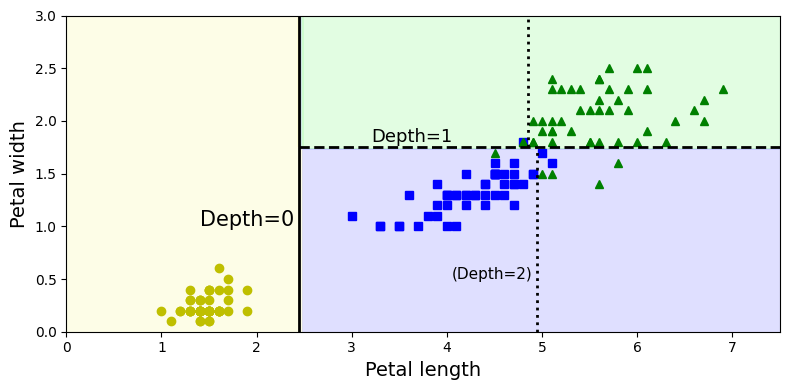

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

These are the **Decision Boundaries** of the Model on `iris` dataset that we have Trained above.

## Model Interpretation: White Box Versus Black Box

| White Box | Black Box |
| :--: | :--: |
| Everything about the Model is Compleately Open and most of the Times we can even Replicate those steps in Real Life. | Predictions of these Models are very Good but we don't know on the basis of What they are Making these Predictions. |
| **e.g** - `Decision Trees` | **e.g** - `SVMs`, `Random Forest` , `Linear Models` *etc.* |